- [ ] [C] [30] Pandas (cont.)
    - Split-apply-merge
    - plotting with Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/wine-rw.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,total sulfur dioxide,alcohol,quality,color
0,7.4,0.70,34.0,9.4,5,red
1,7.8,0.88,67.0,9.8,5,red
2,7.8,0.76,54.0,9.8,5,red
3,11.2,0.28,60.0,9.8,6,red
4,7.4,0.70,34.0,9.4,5,red


In [6]:
np.sort(df.quality.unique())

array([3, 4, 5, 6, 7, 8, 9])

In [14]:
my_dict = {3:'low', 4:'low', 5:'medium', 6:'medium', 7:'medium', 8:'high', 9:'high'}

In [15]:
df['quality_cat'] = [my_dict[el] for el in df.quality.values]

In [16]:
df.head()

,fixed acidity,volatile acidity,total sulfur dioxide,alcohol,quality,color,quality_cat
0,7.4,0.70,34.0,9.4,5,red,medium
1,7.8,0.88,67.0,9.8,5,red,medium
2,7.8,0.76,54.0,9.8,5,red,medium
3,11.2,0.28,60.0,9.8,6,red,medium
4,7.4,0.70,34.0,9.4,5,red,medium


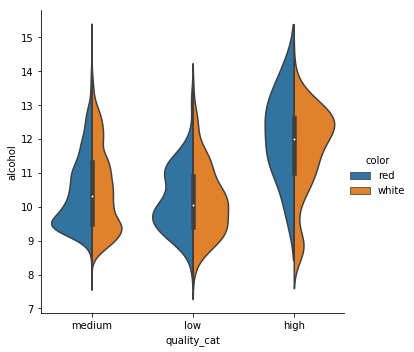

In [18]:
sns.catplot(data=df, x = 'quality_cat', y='alcohol', kind='violin', hue='color', split=True)

## Apply: Make standard deviation equal to one (without moving the mean)

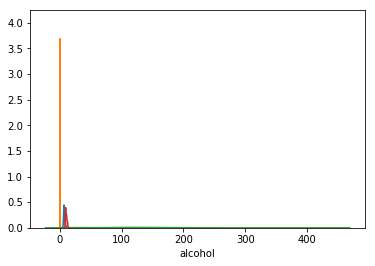

In [26]:
fig, ax = plt.subplots()
for col in ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'alcohol']:
    sns.distplot(df[col], ax=ax)

In [28]:
df_norm = df[['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'alcohol']].apply(lambda x: (x - x.mean()) / x.std())

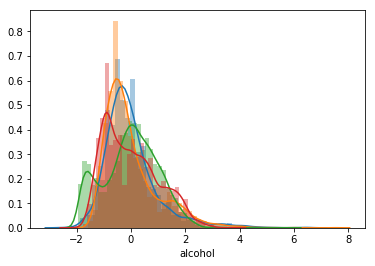

In [29]:
fig, ax = plt.subplots()
for col in ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'alcohol']:
    sns.distplot(df_norm[col], ax=ax)

## Groupby-apply: Do the same as before but for every wine color 

In [40]:
df_norm.head()

,fixed acidity,volatile acidity,total sulfur dioxide,alcohol
0,0.142462,2.188664,-1.446247,-0.915394
1,0.451001,3.281982,-0.862402,-0.580023
2,0.451001,2.553104,-1.092402,-0.580023
3,3.073580,-0.362411,-0.986248,-0.580023
4,0.142462,2.188664,-1.446247,-0.915394


In [44]:
attributes = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'alcohol']

In [46]:
df.groupby('color')[attributes]

## Groupby-agg: mean alcohol value based on quality!

In [37]:
df.groupby('quality_cat')['alcohol'].agg([np.mean, np.std, np.min, np.max, len])

,mean,std,amin,amax,len
quality_cat,,,,,
high,11.691414,1.273262,8.5,14.0,198.0
low,10.184350,0.999035,8.0,13.5,246.0
medium,10.465055,1.175632,8.0,14.9,6053.0
